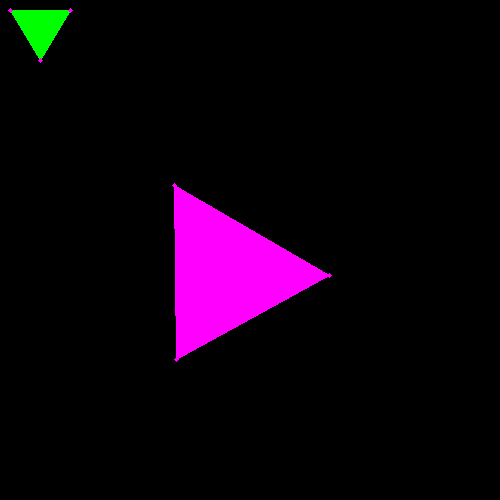

In [5]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow


def draw_triangle(image, vertices, color=(0, 255, 0)):

    # Convert homogeneous coordinates to 2D coordinates
    vertices = np.array([v[:-1] / v[-1] for v in vertices], dtype=np.int32)
    # Draw the filled triangle
    cv.drawContours(image, [vertices], 0, color, -1)
    # Draw circles on the vertices
    for vertex in vertices:
        cv.circle(image, tuple(vertex), 2, (255, 0, 255), -1)

def scale(vertex, sx, sy):

    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    return scaling_matrix @ vertex

def rotate(vertex, angle):

    theta = np.radians(angle)
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
                                [sin_theta, cos_theta, 0],
                                [0, 0, 1]])
    return rotation_matrix @ vertex

def translate(vertex, dx, dy):

    translation_matrix = np.array([[1, 0, dx],
                                   [0, 1, dy],
                                   [0, 0, 1]])
    return translation_matrix @ vertex

# Image dimensions
width, height = 500, 500
image = np.zeros((height, width, 3), dtype=np.uint8)

# Parameters for transformations
rotation_angle = 30
scaling_factor = 3
translation_distance = 200

# Original triangle vertices in homogeneous coordinates
original_triangle = np.array([[10, 10, 1], [70, 10, 1], [40, 60, 1]])

# Apply transformations to the triangle
transformed_triangle = translate(
    rotate(
        scale(
            translate(original_triangle.T, -20, -10),
            scaling_factor, scaling_factor),
        rotation_angle),
    translation_distance, translation_distance)

# Draw the original and transformed triangles
draw_triangle(image, original_triangle)
draw_triangle(image, transformed_triangle.T, color=(255, 0, 255))

# Display the resulting image
cv2_imshow(image)

